In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [418]:
galton = pd.read_csv('galton_height.csv')

In [419]:
galton

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8
894,136A,68.5,65.0,M,67.7,8
895,136A,68.5,65.0,F,64.0,8
896,136A,68.5,65.0,F,63.5,8


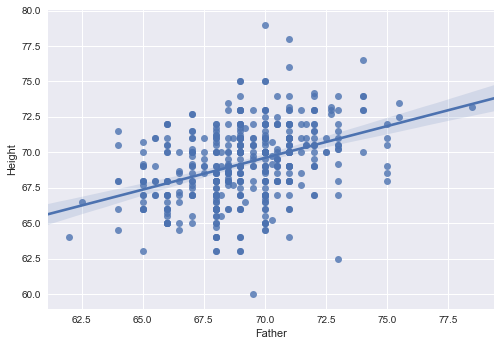

In [420]:
sns.regplot(galton.loc[galton.Gender == 'M'].Father, galton.loc[galton.Gender == 'M'].Height)

In [421]:
galton.loc[galton.Gender == 'M'].Father.corr(galton.loc[galton.Gender == 'M'].Height)

0.3913173581417897

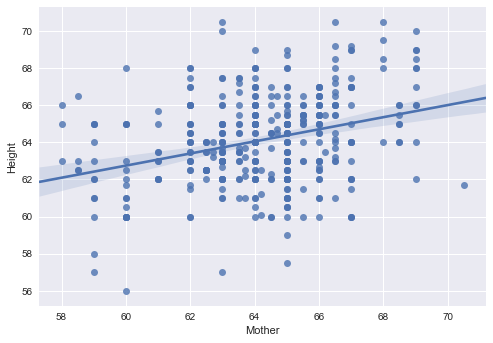

In [422]:
sns.regplot(galton.loc[galton.Gender == 'F'].Mother, galton.loc[galton.Gender == 'F'].Height)

In [423]:
galton.loc[galton.Gender == 'F'].Mother.corr(galton.loc[galton.Gender == 'F'].Height)

0.313698353531348

In [424]:
galton

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8
894,136A,68.5,65.0,M,67.7,8
895,136A,68.5,65.0,F,64.0,8
896,136A,68.5,65.0,F,63.5,8


In [425]:
# no multi-counting
father_distribution = galton.groupby(['Family'], sort=False).Father.mean()
mother_distribution = galton.groupby(['Family'], sort=False).Mother.mean()

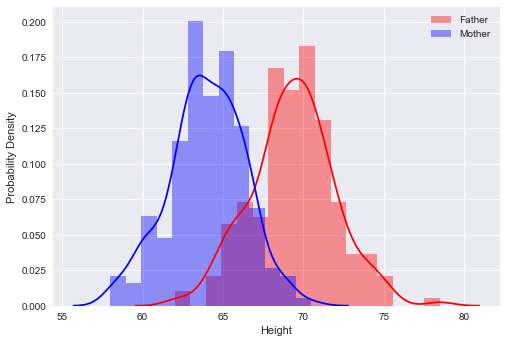

In [426]:
sns.distplot(father_distribution, label='Father', color='red')
sns.distplot(mother_distribution, label='Mother', color='blue')
plt.xlabel('Height')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### Parent descriptors

In [427]:
# true values, no multi-counting
print(father_distribution.mean(), father_distribution.std())  
print(mother_distribution.mean(), mother_distribution.std())

69.34923857868021 2.622034170789886
63.98426395939087 2.3556068786418183


In [428]:
# counts multiple times (as many as the number of offspring)
father_mean = galton.Father.mean()  
father_sd = galton.Father.std()

In [429]:
print(father_mean, father_sd)

69.23285077950997 2.4702558107108206


In [430]:
mother_mean = galton.Mother.mean()
mother_sd = galton.Mother.std()

In [431]:
print(mother_mean, mother_sd)

64.08440979955456 2.3070252210018625


### Offspring descriptors

In [432]:
son_mean = galton.loc[galton.Gender == 'M'].Height.mean()
son_sd = galton.loc[galton.Gender == 'M'].Height.std()

In [433]:
print(son_mean, son_sd)

69.22881720430114 2.6315942826866188


In [434]:
daughter_mean = galton.loc[galton.Gender == 'F'].Height.mean()
daughter_sd = galton.loc[galton.Gender == 'F'].Height.std()

In [435]:
print(daughter_mean, daughter_sd)

64.11016166281759 2.370319602944069


### Naive offspring r sub s

In [436]:
# standard deviations of the individual distributions
son_sds = galton.loc[galton.Gender == 'M'].groupby(['Family'], sort=False).Height.std()
daughter_sds = galton.loc[galton.Gender == 'F'].groupby(['Family'], sort=False).\
                        Height.std()

In [437]:
son_sds.mean(), son_sds.median()

(1.6928601601893907, 1.5275252316519485)

In [438]:
daughter_sds.mean(), daughter_sds.median()

(1.4968470911127525, 1.4142135623730951)

In [439]:
son_sds.mean() / father_sd

0.6852975116379818

In [440]:
daughter_sds.mean() / mother_sd

0.6488212948373069

### Better offspring r sub s

In [441]:
def normalize(row):
    if row.Gender == 'M':
        return (row.Height - son_mean) / son_sd
    elif row.Gender == 'F':
        return (row.Height - daughter_mean) / daughter_sd


galton['NormHeight'] = galton.apply(normalize, axis='columns')

In [442]:
offspring_sds = galton.groupby(['Family'], sort=False).NormHeight.std()

In [443]:
offspring_sds.median(), offspring_sds.mean()

(0.6692042056467554, 0.6873125038392203)

In [444]:
galton_norm.Parent.std()

0.7326884096058295

In [445]:
offspring_sds.median() / galton_norm.Parent.std()

0.9133544312605857

In [446]:
offspring_sds.mean() / galton_norm.Parent.std()

0.9380693004397047

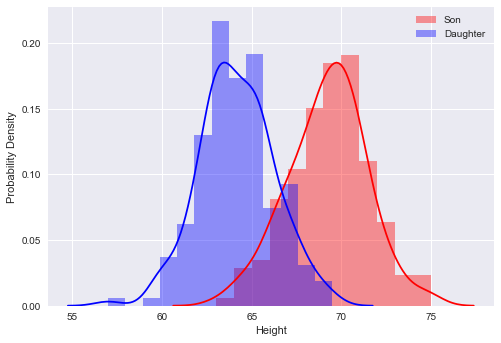

In [447]:
sns.distplot(son_distribution, label='Son', color='red')
sns.distplot(daughter_distribution, label='Daughter', color='blue')
plt.xlabel('Height')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

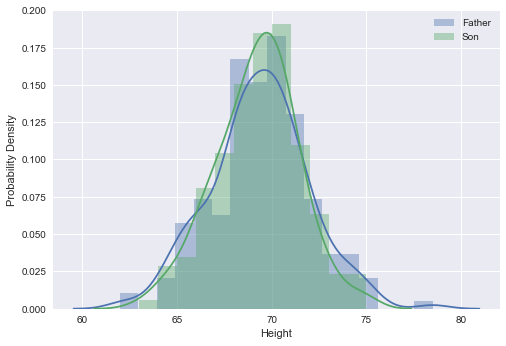

In [448]:
sns.distplot(father_distribution, label='Father')
sns.distplot(son_distribution, label='Son')
plt.xlabel('Height')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

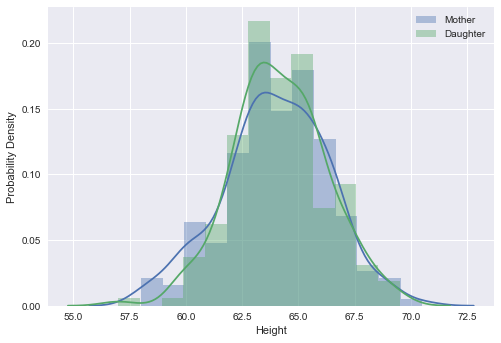

In [449]:
sns.distplot(mother_distribution, label='Mother')
sns.distplot(daughter_distribution, label='Daughter')
plt.xlabel('Height')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [450]:
galton_norm = pd.DataFrame()

In [451]:
galton_norm = pd.DataFrame((galton['Father'] - father_mean) / father_sd)

In [452]:
galton_norm['Mother'] = (galton['Mother'] - mother_mean) / mother_sd

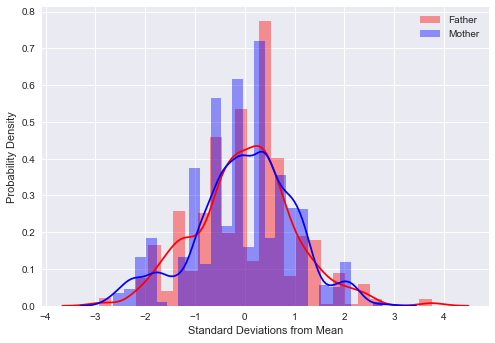

In [453]:
sns.distplot(galton_norm.Father, label='Father', color='red')
sns.distplot(galton_norm.Mother, label='Mother', color='blue')
plt.xlabel('Standard Deviations from Mean')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

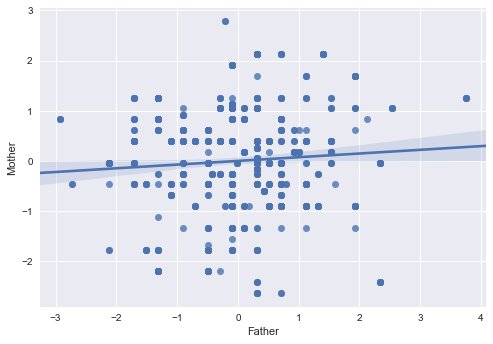

In [454]:
plt.xlabel('Father z-score')
plt.ylabel('Mother z-score')
sns.regplot(galton_norm.Father, galton_norm.Mother)
plt.show()

In [455]:
galton_norm['Parent'] = (galton_norm.Father + galton_norm.Mother) / 2
galton_norm['Offspring'] = galton.apply(normalize, axis='columns')

In [456]:
galton_norm

,Father,Mother,Parent,Offspring
0,3.751494,1.263788,2.507641,1.509041
1,3.751494,1.263788,2.507641,2.147322
2,3.751494,1.263788,2.507641,2.062945
3,3.751494,1.263788,2.507641,2.062945
4,2.537045,1.047058,1.792052,1.623040
...,...,...,...,...
893,-0.296670,0.396870,0.050100,-0.276949
894,-0.296670,0.396870,0.050100,-0.580947
895,-0.296670,0.396870,0.050100,-0.046475
896,-0.296670,0.396870,0.050100,-0.257417


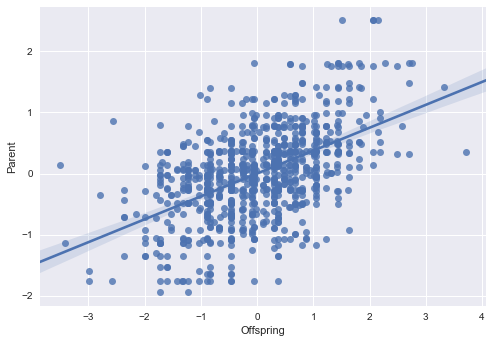

In [457]:
sns.regplot(galton_norm.Offspring, galton_norm.Parent)

In [458]:
galton_norm.corr()

,Father,Mother,Parent,Offspring
Father,1.000000,0.073665,0.732688,0.424994
Mother,0.073665,1.000000,0.732688,0.324175
Parent,0.732688,0.732688,1.000000,0.511247
Offspring,0.424994,0.324175,0.511247,1.000000


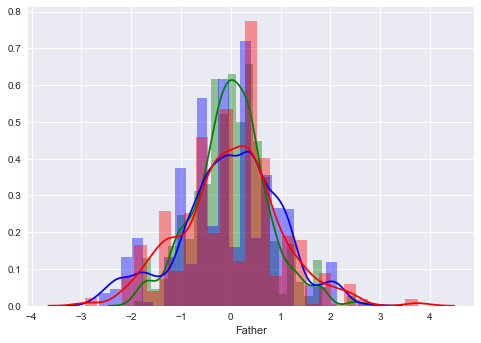

In [459]:
sns.distplot(galton_norm.Parent, color='green')
sns.distplot(galton_norm.Mother, color='blue')
sns.distplot(galton_norm.Father, color='red')


In [460]:
print(
galton_norm.Parent.std(),
galton_norm.Mother.std(),
galton_norm.Father.std(),
galton_norm.Offspring.std())

0.7326884096058295 0.9999999999999896 1.000000000000001 0.9994424309574889


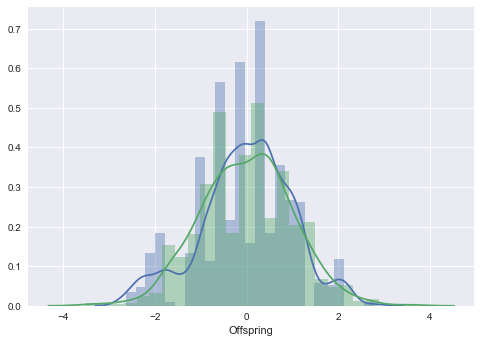

In [461]:
sns.distplot(galton_norm.Mother)
sns.distplot(galton_norm.Offspring)

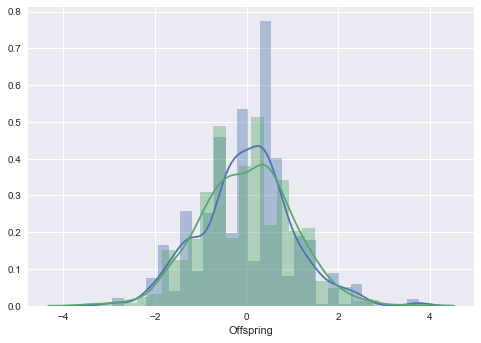

In [462]:
sns.distplot(galton_norm.Father)
sns.distplot(galton_norm.Offspring)

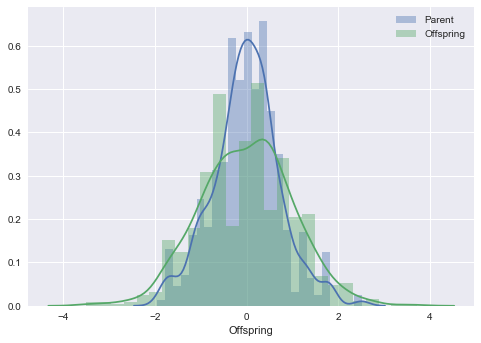

In [463]:
sns.distplot(galton_norm.Parent, label='Parent')
sns.distplot(galton_norm.Offspring, label='Offspring')
plt.legend()
plt.show()

In [464]:
print(galton_norm.Father.std(), 
galton_norm.Mother.std(),
galton_norm.Parent.std(),
galton_norm.Offspring.std())

1.000000000000001 0.9999999999999896 0.7326884096058295 0.9994424309574889


In [465]:
galton_norm

,Father,Mother,Parent,Offspring
0,3.751494,1.263788,2.507641,1.509041
1,3.751494,1.263788,2.507641,2.147322
2,3.751494,1.263788,2.507641,2.062945
3,3.751494,1.263788,2.507641,2.062945
4,2.537045,1.047058,1.792052,1.623040
...,...,...,...,...
893,-0.296670,0.396870,0.050100,-0.276949
894,-0.296670,0.396870,0.050100,-0.580947
895,-0.296670,0.396870,0.050100,-0.046475
896,-0.296670,0.396870,0.050100,-0.257417


In [466]:
import statistics
import numpy as np
import scipy.stats as st

In [467]:
parent = np.array(galton_norm.Parent.tolist())
offspring = np.array(galton_norm.Offspring.tolist())

In [468]:
sd_par = statistics.stdev(parent)

In [469]:
parent /= sd_par

In [470]:
statistics.stdev(parent)

1.0

In [471]:
statistics.stdev(offspring)

0.9994424309574893

In [472]:
N = len(offspring)

My model said that 57% of the offspring above the 80th percentile are from parents below 80th percentile. Galton’s data got 61%.

In [490]:
def to_percent(prop, digits):
    print(str(round(prop * 100, digits)) + '%')

    
def percent_error(approx, exact, digits=2):
    prop = abs(approx - exact) / exact
    return to_percent(prop, digits)


def att_below_percen(percentile):
    attributed_pars = list()
    for i in range(N):
        if offspring[i] >= st.norm.ppf(percentile):
            attributed_pars.append(parent[i])
    
    print(len(attributed_pars), 'attributable parents')
    
    count = 0
    for j in range(len(attributed_pars)):
        if attributed_pars[j] < st.norm.ppf(percentile):
            count += 1
    prop_from_below = count / len(attributed_pars)

    return prop_from_below

In [475]:
att_below_percen(0.8)

165 attributable parents


0.6060606060606061

My model said that 57% of the offspring above the 80th percentile are from parents below 80th percentile. Galton’s data got 61%.

In [495]:
percent_error(approx=0.57, exact=0.61)

6.56%


Percent error between proposed model and Galton's data for 80th percentile

In [477]:
att_below_percen(0.72)

263 attributable parents


0.5171102661596958

My model also said the equilibrium that 50% of the offspring above the 50th percentile are from parents below the 50th percentile. Glaton’s data got 52%.

In [498]:
percent_error(approx=0.52, exact=0.50)

4.0%


Percent error between proposed model and Galton's data for estimated equilibrium percentile

In [504]:
0.2 + np.arange(0, 1, 0.2)

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [545]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [604]:
per_step = 0.2
step_percentile = list()

percent_groups = per_step + np.arange(0, 1, per_step)
num_groups = len(percent_groups)

for par_group_num in range(num_groups):  # parent group loop
    
    bins = list(np.zeros(num_groups))


    percentile_low = percent_groups[par_group_num] - per_step  # parent percentiles
    percentile_high = percent_groups[par_group_num]
    
    count_of_offspring = 0
    for i in range(N):
        if st.norm.ppf(percentile_low) <= parent[i] < st.norm.ppf(percentile_high):
            count_of_offspring += 1
            for off_group_num in range(num_groups):
#                 print(off_group_num)
                if st.norm.ppf(percent_groups[off_group_num] - per_step) <= offspring[i] \
                < st.norm.ppf(percent_groups[off_group_num]):
                    bins[off_group_num] += 1  # add to the bin 
    
    for bin_num in range(num_groups):
#         print(bins[bin_num], count_of_offspring)
        bins[bin_num] /= count_of_offspring
    
    step_percentile.append(bins)
    
# in the transposed one, the bins represent offspring 
transposed_step_percentile = [[] for group_num in range(num_groups)]

for parent_bin_num in range(num_groups):
    for offspring_num in range(num_groups):
        to_append = step_percentile[parent_bin_num][offspring_num]
        transposed_step_percentile[offspring_num].append(to_append)

In [606]:
transposed_step_percentile

[[0.4573170731707317,
  0.3107344632768362,
  0.2465753424657534,
  0.09523809523809523,
  0.04697986577181208],
 [0.24390243902439024,
  0.2033898305084746,
  0.2009132420091324,
  0.19576719576719576,
  0.06040268456375839],
 [0.11585365853658537,
  0.12994350282485875,
  0.182648401826484,
  0.12698412698412698,
  0.1342281879194631],
 [0.14634146341463414,
  0.2655367231638418,
  0.2374429223744292,
  0.32275132275132273,
  0.3221476510067114],
 [0.036585365853658534,
  0.0903954802259887,
  0.1324200913242009,
  0.25925925925925924,
  0.436241610738255]]

In [605]:
step_percentile

[[0.4573170731707317,
  0.24390243902439024,
  0.11585365853658537,
  0.14634146341463414,
  0.036585365853658534],
 [0.3107344632768362,
  0.2033898305084746,
  0.12994350282485875,
  0.2655367231638418,
  0.0903954802259887],
 [0.2465753424657534,
  0.2009132420091324,
  0.182648401826484,
  0.2374429223744292,
  0.1324200913242009],
 [0.09523809523809523,
  0.19576719576719576,
  0.12698412698412698,
  0.32275132275132273,
  0.25925925925925924],
 [0.04697986577181208,
  0.06040268456375839,
  0.1342281879194631,
  0.3221476510067114,
  0.436241610738255]]

In [576]:
plt.style.use('seaborn-talk')

In [577]:
pal = ['xkcd:light navy blue', 'xkcd:windows blue', 'xkcd:turquoise blue', 'xkcd:carolina blue', 'xkcd:light blue']

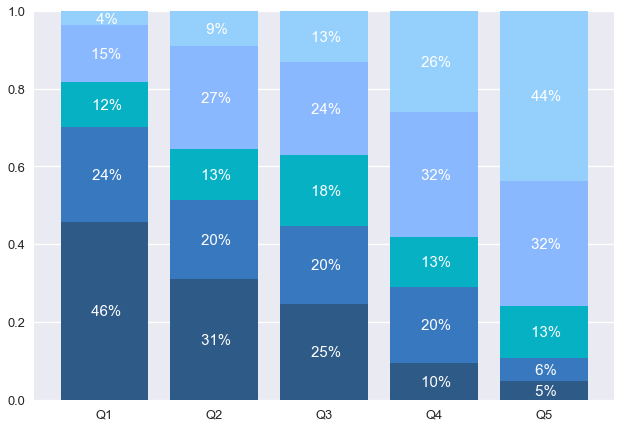

In [610]:
pal = ['xkcd:light navy blue', 'xkcd:windows blue', 'xkcd:turquoise blue', \
       'xkcd:carolina blue', 'xkcd:light blue']

step_labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

plt.ylim(0, 1)
values_sum_list = [0] * len(step_percentile)
for j in range(len(step_percentile)):
    plt.bar(step_labels, transposed_step_percentile[j], \
            bottom=values_sum_list, color=pal[j])
    
    for a, b, c in zip(step_labels, values_sum_list, transposed_step_percentile[j]):
        num = (b + c / 2) - 0.02
        plt.text(a, num, ' ' + "{:0.0%}".format(c), va='bottom', ha='center', color='w', size=15)
    
    for i in range(len(values_sum_list)):
        values_sum_list[i] += transposed_step_percentile[j][i]

R^2 of 0.81 between Galton's data and the proposed model. (Correlations are calculated in the correlation sheet.)